# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Suandi Simanjorang
- **Email:** suandisimanjororang131@gmail.com
- **ID Dicoding:** Suandi Simanjorang

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda berdasarkan musim?
- Bagaimana performa bulanan penyewaan sepeda di setiap tahun?
- Bagaimana pengaruh hari libur dan hari kerja terhadap performa penyewaan sepeda?
- Bagaimana korelasi cuaca, temperatur, kelembaban, dan kecepatan angin terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Baca Data day.csv dan ditampung ke variabel day_df

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Baca Data hour.csv dan ditampung ke variabel hour_df

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**1. data day.csv**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Check : Missing value & Data Type**

Jumlah data di day_df lengkap yang berarti tidak ada missing value. Tetapi terdapat tipe data yang kurang tepat pada kolom:
- dteday seharusnya bertipe data datetime, bukan object
- season seharusnya bertipe data category, bukan int
- yr seharusnya bertipe data category, bukan int
- mnth seharusnya bertipe data category, bukan int
- holiday seharusnya bertipe data category, bukan int
- weekday seharusnya bertipe data category, bukan int
- weathersit seharusnya bertipe data category, bukan int
- workingday seharusnya bertipe data category, bukan int

**Check : Column Name**

Penamaan kolom ada yang sulit dibaca dan kurang baik:
- dteday -> rental_date
- yr -> year
- mnth -> month
- cnt -> count


Untuk isi data kategori dibiarkan angka saja tidak perlu diubah ke string keterangan agar menghemat memori

**Check : Duplicate Data**

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi pada data day_df

**Check : Invalid Value**

In [ ]:
day_df['instant'].nunique()

731

Kolom instant seharusnya unik. Berdasarkan output diatas jumlah data unik kolom instant sama dengan jumlah data. Maka benar bahwa kolom instant memiliki data yang unik

karena kolom cnt merupakan jumlah dari kolom casual dan register maka cek apakah benar nilai kolom cnt == casual+register

In [ ]:
print("jumlah kesalahan penjumlahan kolom cnt = ",((day_df['casual'] + day_df['registered']) != day_df['cnt']).sum())

jumlah kesalahan penjumlahan kolom cnt =  0


dari hasil diatas terlihat bahwa 0 data yang berbeda, maka nilai di kolom cnt benar hasil dari penambahan kolom casual dan registered

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


semua kolom terlihat aman tidak ada masalah, tetapi jika dilihat dari nilai percentil 25 dan nilai min pada kolom registered dan cnt terlihat agak jauh perbedaannya, maka akan dicoba cek IQR untuk menentukan apakah ada outlier

In [ ]:
q25, q75 = np.percentile(day_df['registered'], 25), np.percentile(day_df['registered'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in day_df['registered'] if x < minimum or x > maximum]
if outliers:
  print("terdapat outlier, yaitu:", outliers)
else:
  print("tidak terdapat outlier")

tidak terdapat outlier


In [ ]:
q25, q75 = np.percentile(day_df['cnt'], 25), np.percentile(day_df['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in day_df['cnt'] if x < minimum or x > maximum]
if outliers:
  print("terdapat outlier, yaitu:", outliers)
else:
  print("tidak terdapat outlier")

tidak terdapat outlier


**2. data hour.csv**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Check : Missing value & Data Type**

Jumlah data di hour_df lengkap yang berarti tidak ada missing value. Tetapi terdapat tipe data yang kurang tepat pada kolom:
- dteday seharusnya bertipe data datetime, bukan object
- season seharusnya bertipe data category, bukan int
- yr seharusnya bertipe data category, bukan int
- mnth seharusnya bertipe data category, bukan int
- holiday seharusnya bertipe data category, bukan int
- weekday seharusnya bertipe data category, bukan int
- weathersit seharusnya bertipe data category, bukan int

**Check : Column Name**

Penamaan kolom ada yang sulit dibaca dan kurang baik:
- dteday -> rental_date
- yr -> year
- mnth -> month
- cnt -> count


**Check : Duplicate Data**

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang duplikat

**Check : Invalid Value**

In [ ]:
hour_df['instant'].nunique()

17379

Kolom instant seharusnya unik. Berdasarkan output diatas jumlah data unik kolom instant sama dengan jumlah data. Maka benar bahwa kolom instant memiliki data yang unik

karena kolom cnt merupakan jumlah dari kolom casual dan register maka cek apakah benar nilai kolom cnt == casual+register

In [ ]:
print("jumlah kesalahan penjumlahan kolom cnt = ",((hour_df['casual'] + hour_df['registered']) != hour_df['cnt']).sum())

jumlah kesalahan penjumlahan kolom cnt =  0


dari hasil diatas terlihat bahwa 0 data yang berbeda, maka nilai di kolom cnt benar hasil dari penambahan kolom casual dan registered

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


semua kolom terlihat aman tidak ada masalah

Dari kolom jam bisa ditambahkan informasi mengenai time category, yaitu: [sumber](https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc)
- morning = 5 to 12
- afternoon = 12 to 17
- evening = 17 to 21
- Night = 21 to 5

**Check : unimportant columns**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kolom season, year, month tidak berguna di time series jam ini, maka lebih baik di drop saja agar tidak memakan memori

**3. Kesamaan day.csv dan hour.csv**

**Check : Invalid/Inconsistent Value**

In [ ]:
print("Perbedaan jumlah hari = ",(hour_df['dteday'].unique()!=day_df['dteday'].unique()).sum())

Perbedaan jumlah hari =  0


dari output diatas terlihat bahwa jumlah hari dari kedua tabel tersebut sama

Kolom cnt pada tabel day.csv merupakan jumlah dari kolom cnt di tabel hour.csv berdasarkan kelompok dteday. Maka periksa apakah jumlahnya sama. begitu pula dengan kolom casual dan registered

In [ ]:
cek_data_sum = [0, 0, 0]
cek_data_mean = [0, 0, 0, 0]
# cek_data[cnt, casual, registered, weekday]
cek_kolom_sum=['cnt', 'casual', 'registered']
cek_kolom_mean=['holiday','weekday','workingday']

for date in day_df['dteday'].unique():
  for index, kolom in enumerate(cek_kolom_sum):
    if (hour_df[hour_df['dteday'] == date][kolom].sum())== (day_df[day_df['dteday']==date][kolom].sum()):
      cek_data_sum[index]+=1

  for index, kolom in enumerate(cek_kolom_mean):
    if (hour_df[hour_df['dteday'] == date][kolom].mean())== (day_df[day_df['dteday']==date][kolom].sum()):
      cek_data_mean[index]+=1

for index, kolom in enumerate(cek_kolom_sum):
  if cek_data_sum[index] == day_df['dteday'].nunique() and cek_data_sum[index] == hour_df['dteday'].nunique():
    print("data", kolom, "konsisten di kedua tabel")

for index, kolom in enumerate(cek_kolom_mean):
  if cek_data_mean[index] == day_df['dteday'].nunique() and cek_data_mean[index] == hour_df['dteday'].nunique():
    print("data", kolom, "konsisten di kedua tabel")


data cnt konsisten di kedua tabel
data casual konsisten di kedua tabel
data registered konsisten di kedua tabel
data holiday konsisten di kedua tabel
data weekday konsisten di kedua tabel
data workingday konsisten di kedua tabel


### Cleaning Data

**1. data day.csv**

- **Mengubah tipe data**

In [ ]:
kolom_datetime = ['dteday']
kolom_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for kolom in kolom_datetime:
  day_df[kolom] = pd.to_datetime(day_df[kolom])

for kolom in kolom_category:
  day_df[kolom] = day_df[kolom].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

- **Perbaikan penamaan kolom**

  Penamaan kolom ada yang sulit dibaca dan kurang baik:
  - dteday -> rental_date
  - yr -> year
  - mnth -> month
  - cnt -> count

In [ ]:
day_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   rental_date  731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

- **Export data**

In [ ]:
day_df.to_csv("day_clean.csv", index=False)

**2. data hour.csv**

- **Mengubah tipe data**

In [ ]:
kolom_datetime = ['dteday']
kolom_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for kolom in kolom_datetime:
  hour_df[kolom] = pd.to_datetime(hour_df[kolom])

for kolom in kolom_category:
  hour_df[kolom] = hour_df[kolom].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- **Perbaikan penamaan kolom**

  Penamaan kolom ada yang sulit dibaca dan kurang baik:
  - dteday -> rental_date
  - yr -> year
  - mnth -> month
  - hr -> hour
  - cnt -> count

In [ ]:
hour_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   rental_date  17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

- **Penambahan kolom**

  [Time Category](https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc)
  - morning =     5 to 12
  - afternoon =   12 to 17
  - evening =     17 to 21
  - Night =       21 to 5

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour or hour < 5:
        return 'Night'
    else :
      return '-'

hour_df['time_category'] = hour_df['hour'].apply(categorize_time)

print(hour_df[['hour','time_category']].head(5))
print("time kategori = ", hour_df['time_category'].unique())

   hour time_category
0     0         Night
1     1         Night
2     2         Night
3     3         Night
4     4         Night
time kategori =  ['Night' 'Morning' 'Afternoon' 'Evening']


In [ ]:
hour_df['time_category'] = hour_df['time_category'].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   rental_date    17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   year           17379 non-null  category      
 4   month          17379 non-null  category      
 5   hour           17379 non-null  int64         
 6   holiday        17379 non-null  category      
 7   weekday        17379 non-null  category      
 8   workingday     17379 non-null  category      
 9   weathersit     17379 non-null  category      
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

- **Menghapus kolom yang tidak penting**

In [ ]:
kolom_drop = ['season', 'year', 'month']
hour_df = hour_df.drop(columns=kolom_drop)

- **Export data**

In [ ]:
hour_df.to_csv("hour_clean.csv", index=False)

## Exploratory Data Analysis

### Explore data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   rental_date  731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

- **Mencari korelasi**

In [ ]:
day_df.corr(numeric_only=True)

,instant,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


temperatur (kolom: temp dan atemp) memiliki korelasi tertinggi dengan count of total rental bikes (kolom: count) yaitu lebih dari 0.5

- **Hubungan season dengan jumlah rental**

In [ ]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

(1:springer, 2:summer, 3:fall, 4:winter)

Berdasarkan pivot table di atas, dapat diketahui bahwa rental ramai ketika musim gugur/fall (3)

- **Hubungan hari dengan jumlah rental**

In [ ]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
          max   min         mean     sum          std
weekday                                              
0        8227   605  4228.828571  444027  1872.496629
1        7525    22  4338.123810  455503  1793.074013
2        7767   683  4510.663462  469109  1826.911642
3        8173   441  4548.538462  473048  2038.095884
4        7804   431  4667.259615  485395  1939.433317
5        8362  1167  4690.288462  487790  1874.624870
6        8714   627  4550.542857  477807  2196.693009

dari tabel diatas, terlihat bahwa hari tidak terlalu berpengaruh besar karena max,mean,dan sum tidak terlalu berbeda.

- **Hubungan hari libur dengan jumlah rental**

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

hari libur tidak membuat rental menjadi lebih ramai, justru saat tidak libur rental lebih ramai, bisa jadi karena dipakai untuk sekolah atau kerja

- **Hubungan hari kerja dengan jumlah rental**

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
             max  min         mean      sum          std
workingday                                              
0           8714  605  4330.168831  1000269  2052.141245
1           8362   22  4584.820000  2292410  1878.415583

Dari tabel diatas terlihat bahwa rental lebih ramai ketika workingday dibandingkan holiday

- **Hubungan bulan dengan jumlah rental**

In [ ]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
        max   min         mean     sum          std
month                                              
1      4521   431  2176.338710  134933  1161.674370
2      5062  1005  2655.298246  151352  1145.313307
3      8362   605  3692.258065  228920  1899.301812
4      7460   795  4484.900000  269094  1776.160778
5      8294  2633  5349.774194  331686  1298.711561
6      8120  3767  5772.366667  346342  1240.400031
7      8173  3285  5563.677419  344948  1273.751871
8      7865  1115  5664.419355  351194  1494.516146
9      8714  1842  5766.516667  345991  1810.130649
10     8156    22  5199.225806  322352  1988.392517
11     6852  1495  4247.183333  254831  1285.712709
12     6606   441  3403.806452  211036  1549.639353

Jumlah rental meningkat mulai bulan 5 sampai bulan 9, dan mulai menurun saat bulan 10. mari kita lihat bagaimana musim di bulan tersebut :

In [ ]:
for x in range (5,10):
  print('bulan ke -', x)
  print(day_df.loc[day_df['month'] == x, 'season'].values.astype(int).mean())

bulan ke - 5
2.0
bulan ke - 6
2.3333333333333335
bulan ke - 7
3.0
bulan ke - 8
3.0
bulan ke - 9
3.2666666666666666


In [ ]:
day_df.groupby('month')['season'].apply(lambda x: x.mode()[0])

month
1     1
2     1
3     1
4     2
5     2
6     2
7     3
8     3
9     3
10    4
11    4
12    4
Name: season, dtype: int64

ternyata bulan 5 sampai 9 adalah menuju dan sampai musim gugur (fall) selesai

**ANALISIS RFM, mencari pola user casual dan register**

- **Hubungan jenis user dengan jumlah rental**

Terdapat 2 jenis user yaitu casual dan registered, mari kita cek mana yang lebih banyak

In [ ]:
day_df[['casual','registered']].sum()

casual         620017
registered    2672662
dtype: int64

In [ ]:
day_df['registered'].sum()/day_df['casual'].sum()

4.310626966679946

ternyata user register 4 kali lebih banyak dari user casual

- **Mencari kemungkinan apakah ada kondisi user casual mengungguli register**

kemudian kita lihat apakah ada kondisi dimana user casual bisa melebihi user registered, contohnya saat holiday, working day, season atau kondisi cuaca (wheathersit)

In [ ]:
day_df[['workingday','casual','registered']].groupby('workingday').sum()

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [ ]:
day_df[['holiday','casual','registered']].groupby('holiday').sum()

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [ ]:
day_df[['season','casual','registered']].groupby('season').sum()

,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


In [ ]:
day_df[['weathersit','casual','registered']].groupby('weathersit').sum()

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


Ternyata di kondisi saat holiday, working day, season atau kondisi cuaca (wheathersit) apapun jumlah user registered selalu mengungguli

- **Kenaikan jumlah rental**

In [ ]:
day_df.groupby(by='year')['month'].nunique()

year
0    12
1    12
Name: month, dtype: int64

In [ ]:
day_df[['year','count']].groupby('year').sum()

,count
year,
0,1243103
1,2049576


Tahun 2012 memiliki jumlah rental lebih banyak yang berarti terjadi peningkatan dari tahun sebelumnya

In [ ]:
day_df[['year','month','count']].groupby(['year','month']).sum()

count
year month        
0    1       38189
     2       48215
     3       64045
     4       94870
     5      135821
     6      143512
     7      141341
     8      136691
     9      127418
     10     123511
     11     102167
     12      87323
1    1       96744
     2      103137
     3      164875
     4      174224
     5      195865
     6      202830
     7      203607
     8      214503
     9      218573
     10     198841
     11     152664
     12     123713

jika dilihat dari data perbulan, kenaikan terjadi pada bulan 5 sampai 9. hal ini bisa disebabkan oleh musim

### Explore data hour_df

Pada data ini memiliki hal yang sama dengan tabel day_df. tetapi terdapat perbedaan 1 kolom yaitu hour, hal ini masih bisa dianalisis berdasarkan jam yang menghasilkan jumlah rental terbanyak

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   rental_date    17379 non-null  datetime64[ns]
 2   hour           17379 non-null  int64         
 3   holiday        17379 non-null  category      
 4   weekday        17379 non-null  category      
 5   workingday     17379 non-null  category      
 6   weathersit     17379 non-null  category      
 7   temp           17379 non-null  float64       
 8   atemp          17379 non-null  float64       
 9   hum            17379 non-null  float64       
 10  windspeed      17379 non-null  float64       
 11  casual         17379 non-null  int64         
 12  registered     17379 non-null  int64         
 13  count          17379 non-null  int64         
 14  time_category  17379 non-null  category      
dtypes: category(5), dat

- **Memeriksa korelasi**

In [ ]:
hour_df.corr(numeric_only=True)

,instant,hour,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,-0.004775,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hour,-0.004775,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
temp,0.136178,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
count,0.278379,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


hour, temp, atemp, dan hum memiliki korelasi diatas 0.3

sedangkan windspeed memiliki korelasi yang kecil yaitu tidak sampai 0.1

- **Hubungan jam dengan count**

In [ ]:
hour_df[['hour','count']].groupby(by='hour').sum().sort_values(by='count',ascending=False).head(5)

,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789


In [ ]:
hour_df[['time_category','count']].groupby(by='time_category').sum().sort_values(by='count',ascending=False)

,count
time_category,
Evening,1037971
Afternoon,955882
Morning,921580
Night,377246


Dari kedua output diatas (hour dan time category), rental paling ramai yaitu saat time category "Evening" yaitu dengan rentang jam 17 sampai 21

- **Hubungan waktu dan working day dengan count**

In [ ]:
hour_df[['time_category','count','workingday']].groupby(['workingday','time_category']).sum()

count
workingday time_category        
0          Afternoon      419306
           Evening        232858
           Morning        212252
           Night          135853
1          Afternoon      536576
           Evening        805113
           Morning        709328
           Night          241393

Dari tabel diatas terlihat bahwa saat workingday rental lebih ramai pada pagi dan sore hari. Sedangkan saat weekend/holiday lebih ramai ketika siang hari.

hal ini bisa disebabkan karena pada workingday mungkin orang menggunakannya untuk berangkat(pagi) dan pulang kerja(sore)

- **Hubungan kondisi cuaca(wheathersit) dengan count**

In [ ]:
hour_df[['weathersit','count']].groupby(by='weathersit').sum()

,count
weathersit,
1,2338173
2,795952
3,158331
4,223


In [ ]:
hour_df[['time_category','count','weathersit']].groupby(['weathersit','time_category']).sum().sort_values(by=['weathersit','count'])

count
weathersit time_category        
1          Night          279745
           Morning        588519
           Afternoon      688566
           Evening        781343
2          Night           80825
           Evening        197613
           Afternoon      224904
           Morning        292610
3          Night           16653
           Morning         40451
           Afternoon       42376
           Evening         58851
4          Morning             0
           Night              23
           Afternoon          36
           Evening           164

dari output diatas didapat informasi:

- weathersit 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
  
  Pada kondisi cuaca ini, jumlah rental terbanyak terdapat pada siang dan sore hari
- weathersit 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  Pada kondisi cuaca ini, jumlah rental terbanyak terdapat pada pagi dan siang hari
- weathersit 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  Pada kondisi cuaca ini, jumlah rental terbanyak terdapat pada siang dan sore hari
- weathersit 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

  Pada kondisi cuaca ini, jumlah rental terbanyak terdapat pada siang dan sore hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda berdasarkan musim?

In [ ]:
season_rental = day_df[['count','season']].groupby(by='season').sum().reset_index()
season_map = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
season_rental['season'] = season_rental['season'].map(season_map)
season_rental.sort_values(by='count', ascending=False,inplace=True)
season_rental = season_rental.reset_index()
season_rental

,index,season,count
0,2,fall,1061129
1,1,summer,918589
2,3,winter,841613
3,0,springer,471348


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

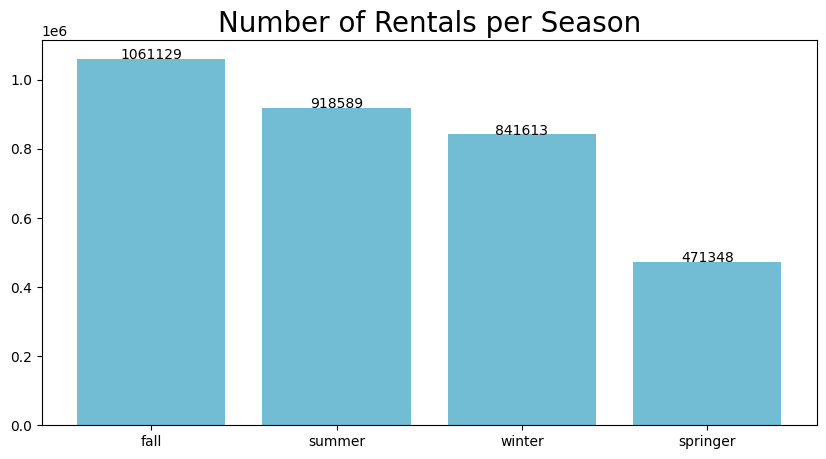

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=season_rental['season'], height=season_rental['count'],color='#72BCD4')
plt.title("Number of Rentals per Season", loc="center", fontsize=20)
addlabels(season_rental['season'],season_rental['count'])
plt.show()

Dapat diketahui bahwa rental ramai ketika musim gugur/fall. Berdasarkan [artikel](https://transportation.ucla.edu/blog/why-fall-best-season-bike-riding), musim gugur adalah musim terbaik untuk bersepeda

### Pertanyaan 2: Bagaimana performa bulanan penyewaan sepeda di setiap tahun?

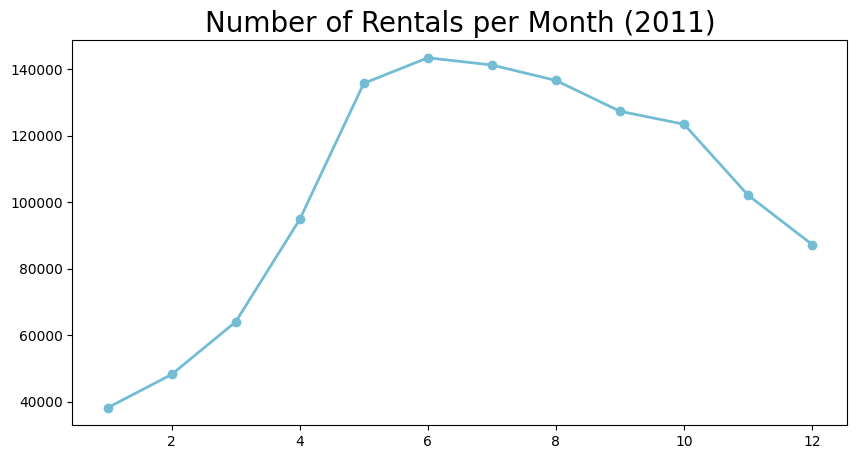

In [ ]:
monthly_2011_df = day_df[day_df['year']==0][['month','count']].groupby('month').sum()
monthly_2011_df  = monthly_2011_df.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_2011_df["month"], monthly_2011_df["count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rentals per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

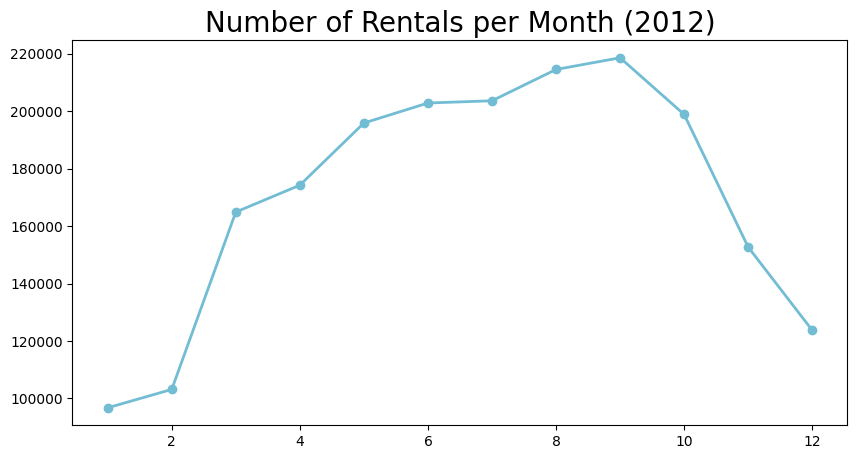

In [ ]:
monthly_2012_df = day_df[day_df['year']==1][['month','count']].groupby('month').sum()
monthly_2012_df  = monthly_2012_df.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_2012_df["month"], monthly_2012_df["count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rentals per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Jumlah rental meningkat mulai bulan 5 sampai bulan 9, dan mulai menurun saat bulan 10. Penyebab kenaikan ini bisa dipengaruhi oleh musim.

In [ ]:
for x in range (5,10):
  print('bulan ke -', x)
  print(day_df.loc[day_df['month'] == x, 'season'].values.astype(int).mean())

bulan ke - 5
2.0
bulan ke - 6
2.3333333333333335
bulan ke - 7
3.0
bulan ke - 8
3.0
bulan ke - 9
3.2666666666666666


Ternyata musim pada bulan 5 sampai 9 adalah menuju musim gugur dan sampai musim gugur (fall) selesai

### Pertanyaan 3: Bagaimana pengaruh hari libur dan hari kerja terhadap performa penyewaan sepeda?

In [ ]:
day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


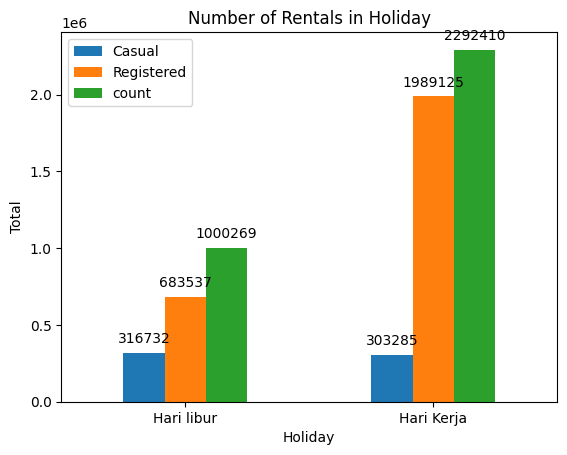

In [ ]:
workingday_rental = day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

ax = workingday_rental.plot(kind='bar', x='workingday', y=['casual', 'registered', 'count'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Holiday')
plt.ylabel('Total')
plt.title('Number of Rentals in Holiday')
plt.xticks([1, 0], ['Hari Kerja', 'Hari libur'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()

In [ ]:
day_df[['holiday','casual','registered','count']].groupby(by='holiday').sum().reset_index()

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


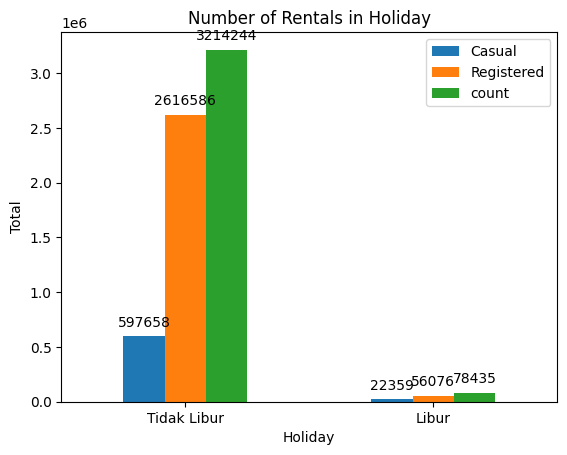

In [ ]:
holiday_rental = day_df[['holiday','casual','registered','count']].groupby(by='holiday').sum().reset_index()

ax = holiday_rental.plot(kind='bar', x='holiday', y=['casual', 'registered', 'count'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Holiday')
plt.ylabel('Total')
plt.title('Number of Rentals in Holiday')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()

Jumlah rental sepeda saat hari kerja jauh lebih banyak dibanding hari libur, hal ini bisa jadi disebabkan karena rental sepeda digunakan untuk berangkat kerja atau sekolah

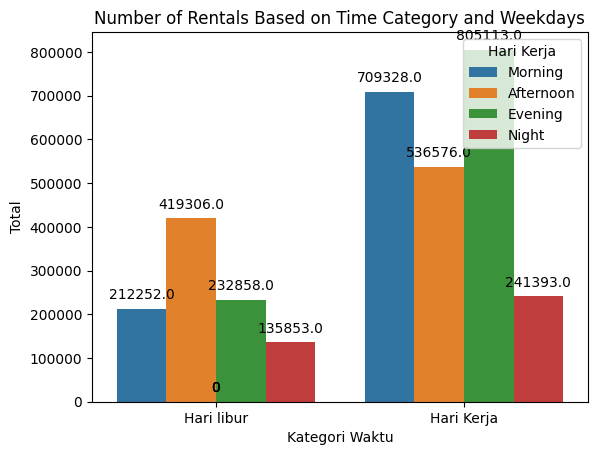

In [ ]:
time_rental = hour_df[['time_category','count','workingday']].groupby(['workingday','time_category']).sum().reset_index()

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_rental['time_category'] = pd.Categorical(time_rental['time_category'], categories=time_order, ordered=True)

ax = sns.barplot(x='workingday', y='count', hue='time_category', data=time_rental, )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Kategori Waktu')
plt.ylabel('Total')
plt.xticks([1, 0], ['Hari Kerja', 'Hari libur'], rotation=0)
plt.title('Number of Rentals Based on Time Category and Weekdays')
plt.legend(title='Hari Kerja', loc='upper right')
plt.show()

Dari grafik diatas terlihar bahwa saat hari kerja, rental ramai di pagi dan sore hari bisa jadi karena sepeda digunakan untuk berangkat kerja dan pulang kerja

### Pertanyaan 4: Bagaimana korelasi cuaca, temperatur, kelembaban, dan kecepatan angin terhadap jumlah penyewaan sepeda?

In [ ]:
# korelasi cuaca dengan jumlah rental
print("korelasi cuaca dengan jumlah rental =",hour_df['weathersit'].corr(hour_df['count']))

korelasi cuaca dengan jumlah rental = -0.1424261381380953


In [ ]:
# korelasi temperatur dengan jumlah rental
print("korelasi temperatur dengan jumlah rental =",day_df['temp'].corr(day_df['count']))

korelasi temperatur dengan jumlah rental = 0.6274940090334918


In [ ]:
# korelasi kelembaban dengan jumlah rental
print("korelasi kelembaban dengan jumlah rental =",hour_df['hum'].corr(hour_df['count']))

korelasi kelembaban dengan jumlah rental = -0.3229107408245603


In [ ]:
# korelasi kecepatan angin dengan jumlah rental
print("korelasi kecepatan angin dengan jumlah rental =",hour_df['windspeed'].corr(hour_df['count']))

korelasi kecepatan angin dengan jumlah rental = 0.09323378392612532


Dari perhitungan korelasi diatas,
- cuaca dan kelembaban memiliki korelasi negatif yang berarti berlawanan
- temperatur dan kecepatan angin memiliki korelasi positif

temperatur memiliki korelasi tertinggi yaitu 0.63

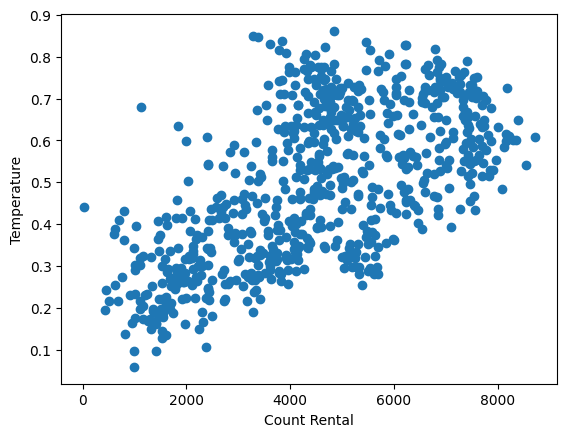

In [ ]:
plt.scatter(x=day_df['count'], y=day_df['temp'])
plt.xlabel('Count Rental')
plt.ylabel('Temperature')
plt.show()

**Monetary**

## Conclusion

- Conclusion pertanyaan 1

	Performa penyewaan sepeda pada setiap musim terlihat baik dan tidak ada anjlokan yang terlalu jauh, tetapi rental lebih ramai ketika musim gugur karena berdasarkan artikel, musim gugur adalah musim terbaik untuk bersepeda

- Conclusion pertanyaan 2

	Jumlah rental mulai meningkat pada bulan 5 sampai bulan 9 di setiap tahun nya, hal ini juga dipengaruhi musim karena musim di bulan tersebut adalah musim gugur

- Conclusion pertanyaan 3

	Jumlah rental pada hari kerja lebih banyak lebih dari 2 kali lipat dari hari libur. Hal ini disebabkan karena bisa jadi sepeda digunakan untuk kerja atau sekolah

- Conclusion pertanyaan 4

	cuaca, kelembaban, dan kecepatan angin memiliki korelasi yang rendah. Sedangkan temperatur memiliki korelasi positif yang lumayan tinggi yaitu 0.63